# Playground for Exercise 2 Module 3

## Exercise 2 

We want to model motion near Earth, but far enough from its surface, such as $g$ is not constant, but we must use Newton's gravitational force.
* We know that the acceleration due to gravity is $g = 9.8 m/s^2$, and the gravitational force on a mass $m$ at a distance $r$ from Earth's center is: 
$$F = -G\frac{ m M_{Earth}}{r^2}. $$
* We also know that the gravitational constant is $G = 6.674\times^{-11} \frac{N m^2}{kg^2}$, the mass of the Earth is:$M_{Earth} = 5.972\times 10^{24} kg$ and the radius of the Earth is: $R_{Earth} = 6.371\times 10^{6} m$  
    - Create a Python function to work in this situation
    - What is the percentage difference in the peak height *above the Earth's surface* compared to the case of constant $g$ if the initial velocity is $300$ m/s?  
    - What is the percentage difference in the peak height if the initial speed is $3300$ m/s? ($30\%$ of escape velocity.) Is it legitimate that we usually ignore the height-dependence of $g$? 
    
Note: *You will want your function to print out the peak height.  You will also want to set the final time so that you can see most of the motion, starting from the Earth's surface and back down to it.  Don't plot the part of the trajectory below the surface, since that would be physically unrealistic!*

In [1]:
from vpython import *
from math import *

%matplotlib inline
from matplotlib.pyplot import *

v0 = eval(input("enter initial vertical velocity: "))

<IPython.core.display.Javascript object>

enter initial vertical velocity: 300


In [2]:
tf = eval(input("enter final time for the vertical motion: "))

enter final time for the vertical motion: 60


In [3]:
# Set up initial values and constants(SI units)
t = 0          # initial time
dt = 0.01      # time step
y1, y2 = 0., 0.          # initial distance from Earth's surface

G = 6.674E-11   # gravitational constant
M = 5.972E24    # mass of Earth
R = 6.371E6     # radius of Earth
g = -G*M/(R**2) # gravitational acceleration at sea level

r = R + y1      # initial distance
v1, v2 = v0, v0         # initial velocity

# Create empty lists for variables and append initial values to lists
time = [] 
ypos1 = []
yvel1 = []
yacc = []
ypos2 = []
yvel2 = []

time.append(t)
ypos1.append(y1)
yvel1.append(v1)
yacc.append(g)
ypos2.append(y2)
yvel2.append(v2)

In [4]:
print("The acceleration due to gravity at sea level is", g)

The acceleration due to gravity at sea level is -9.819532032815959


In [5]:
# Calculate new values for variables for Newton's law of gravity, and append to lists
while t < tf:
    ay = - G*M/ r**2   # height-dependent acceleration 
    v1 = v1 + ay * dt  # velocity
    y1 = y1 + v1 * dt  # position
    v2 = v2 + g * dt  # velocity
    y2 = y2 + v2 * dt  # position
    if y1 <= 0:        # bounce when it reaches the Earth
        v1 = -v1
    if y2 <= 0:        # bounce when it reaches the Earth
        v2 = -v2
    t = t + dt         # advance t by a step dt
    r = R + y1          # update distance from earth
    # append new values to lists
    time.append(t)
    ypos1.append(y1)
    yvel1.append(v1)
    yacc.append(ay)
    ypos2.append(y2)
    yvel2.append(v2)

In [6]:
# Look at the results
print("The maximum height from Newton's law of gravity", max(ypos1), "m")
print("The maximum height for constant gravitational acceleration is ", max(ypos2), "m")

The maximum height from Newton's law of gravity 4584.499724005689 m
The maximum height for constant gravitational acceleration is  4581.2031689533915 m


Text(0, 0.5, 'Vertical Position (m)')

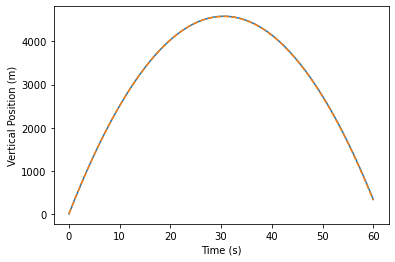

In [7]:
# Look at the results


plot(time, ypos1, time, ypos2,'--')
xlabel("Time (s)")
ylabel("Vertical Position (m)")

## Assignment
Create a VPython animation to describe this motion.